# Importing Required Libraries

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns            
import operator
from collections import Counter
import warnings     
import json
from keras.models import Model
from keras.layers import Input, Dense, Embedding, concatenate, Flatten, Activation, Add, Dropout, Multiply
from keras.optimizers import Adam

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')

# Lets look into each dataset provided

### Credits

In [2]:
credits = pd.read_csv('credits.csv')
credits.head(5)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


### Keywords

In [3]:
keywords = pd.read_csv('keywords.csv')
keywords.head(5)

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


### Links

In [4]:
links = pd.read_csv('links.csv')
links.head(5)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


### Links Small

In [5]:
links_small = pd.read_csv('links_small.csv')

links_small.head(5)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


Both the Links small and Links datasets contain identical information, with the Links small dataset being a subset of the Links dataset. Consequently, we can disregard either one.

### Ratings Small

In [6]:
ratings_small = pd.read_csv('ratings_small.csv')
ratings_small.head(5)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


Similarly, we have both the Ratings and Ratings small datasets, where one is a subset of the other. Therefore, we can choose to disregard one of them.

### Movies Metadata

In [7]:
movies = pd.read_csv('movies_metadata.csv')
movies.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [8]:
print(f'Number of rows: {movies.shape[0]}')
print(f'Number of columns: {movies.shape[1]}')

Number of rows: 45466
Number of columns: 24


### Dropping irrelevant columns

In [9]:
movies.drop(movies[movies['adult'] == 'True'].index, axis='rows', inplace=True)
movies.drop(labels = ['adult', 'belongs_to_collection', 'homepage', 'poster_path', 'video'], axis='columns', inplace=True)

We will be working with the remaning columns shown below. As the columns were all over the place, rearranging them with the reindex method makes it look more organized. You can compare the DataFrame outputs from above and below to see if this made any difference.

In [10]:
movies.columns
movies = movies.reindex(columns = ['imdb_id','title','original_title','release_date','overview','tagline','genres', 'runtime',
                                   'original_language','spoken_languages','production_companies','production_countries', 
                                   'budget', 'revenue','status',  'vote_average','vote_count','popularity',])
movies.head(3)

Index(['budget', 'genres', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

,imdb_id,title,original_title,release_date,overview,tagline,genres,runtime,original_language,spoken_languages,production_companies,production_countries,budget,revenue,status,vote_average,vote_count,popularity
0,tt0114709,Toy Story,Toy Story,1995-10-30,"Led by Woody, Andy's toys live happily in his ...",NaN,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",81.0,en,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",30000000,373554033.0,Released,7.7,5415.0,21.946943
1,tt0113497,Jumanji,Jumanji,1995-12-15,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",104.0,en,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...","[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",65000000,262797249.0,Released,6.9,2413.0,17.015539
2,tt0113228,Grumpier Old Men,Grumpier Old Men,1995-12-22,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",101.0,en,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",0,0.0,Released,6.5,92.0,11.7129


### Data Cleaning

The columns such as *genres*, *production_companies*, *production_countries*, and *spoken_languages* appear to be JSON objects converted into strings. The code cells below extract the necessary substrings using regular expressions.

In [11]:
movies[['title', 'genres', 'production_companies', 'production_countries', 'spoken_languages']].head(3)

,title,genres,production_companies,production_countries,spoken_languages
0,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]"
1,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}, {'iso..."
2,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]"


From the displayed columns, it's evident that the desired substring adheres to a specific pattern: a colon, followed by whitespace, a single quote, one or more words, and finally another single quote. We can encapsulate this pattern with a regular expression, compile it, and utilize it to locate all instances of words matching this pattern in each column through the application of a lambda function.

In [12]:
import re
regex = re.compile(r": '(.*?)'")
movies['genres'] = movies['genres'].apply(lambda x: ', '.join(regex.findall(x)))

We can apply the same code to the remaining columns - *production_companies*, *production_countries*, and *spoken_languages*. However, it's necessary to remove missing values to simplify the lambda function and avoid additional logic. Since the number of missing values is insignificant compared to the entire dataset, dropping them wouldn't impact subsequent analysis.

In [13]:
print('Number of missing values in production_companies column: {}'.format(movies['production_companies'].isna().sum()))
print('Number of missing values in spoken_languages column: {}'.format(movies['spoken_languages'].isna().sum()))

Number of missing values in production_companies column: 3
Number of missing values in spoken_languages column: 6


In [14]:
movies.dropna(subset=['production_companies'], axis='rows', inplace=True)
movies.dropna(subset=['spoken_languages'], axis='rows', inplace=True)

print('Number of missing values in production_companies column: {}'.format(movies['production_companies'].isna().sum()))
print('Number of missing values in spoken_languages column: {}'.format(movies['spoken_languages'].isna().sum()))

Number of missing values in production_companies column: 0
Number of missing values in spoken_languages column: 0


In [15]:
movies['production_companies'] = movies['production_companies'].apply(lambda x: ', '.join(regex.findall(x)))
movies['production_countries'] = movies['production_countries'].apply(lambda x: ', '.join(regex.findall(x)))
movies['spoken_languages'] = movies['spoken_languages'].apply(lambda x: ', '.join(regex.findall(x)))

In [16]:
movies[['title', 'genres', 'production_companies', 'production_countries', 'spoken_languages']].head(3)

,title,genres,production_companies,production_countries,spoken_languages
0,Toy Story,"Animation, Comedy, Family",Pixar Animation Studios,"US, United States of America","en, English"
1,Jumanji,"Adventure, Fantasy, Family","TriStar Pictures, Teitler Film, Interscope Com...","US, United States of America","en, English, fr, Français"
2,Grumpier Old Men,"Romance, Comedy","Warner Bros., Lancaster Gate","US, United States of America","en, English"


### Changing Columns to Correct Dtypes

In [17]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45451 entries, 0 to 45465
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_id               45434 non-null  object 
 1   title                 45451 non-null  object 
 2   original_title        45451 non-null  object 
 3   release_date          45368 non-null  object 
 4   overview              44497 non-null  object 
 5   tagline               20406 non-null  object 
 6   genres                45451 non-null  object 
 7   runtime               45194 non-null  float64
 8   original_language     45440 non-null  object 
 9   spoken_languages      45451 non-null  object 
 10  production_companies  45451 non-null  object 
 11  production_countries  45451 non-null  object 
 12  budget                45451 non-null  object 
 13  revenue               45451 non-null  float64
 14  status                45370 non-null  object 
 15  vote_average       

In [18]:
movies['budget'] = movies['budget'].astype(float)
movies['popularity'] = movies['popularity'].astype(float)
movies['release_date'] = pd.to_datetime(movies['release_date'], format='%Y/%m/%d', errors='coerce')
movies['runtime'] = pd.to_timedelta(movies['runtime'], unit='m')

In [19]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45451 entries, 0 to 45465
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   imdb_id               45434 non-null  object         
 1   title                 45451 non-null  object         
 2   original_title        45451 non-null  object         
 3   release_date          45368 non-null  datetime64[ns] 
 4   overview              44497 non-null  object         
 5   tagline               20406 non-null  object         
 6   genres                45451 non-null  object         
 7   runtime               45194 non-null  timedelta64[ns]
 8   original_language     45440 non-null  object         
 9   spoken_languages      45451 non-null  object         
 10  production_companies  45451 non-null  object         
 11  production_countries  45451 non-null  object         
 12  budget                45451 non-null  float64        
 13  r

### Dropping Missing values

In [20]:
print('Number of missing values in imdb_id: {}'.format(movies['imdb_id'].isna().sum()))
movies.dropna(subset=['imdb_id'], inplace=True)
print('Number of missing values in imdb_id after drop: {}'.format(movies['imdb_id'].isna().sum()))

Number of missing values in imdb_id: 17
Number of missing values in imdb_id after drop: 0


### Removing Duplicates

In [21]:
cond = movies['imdb_id'].duplicated(keep=False)
movies.loc[cond, ['imdb_id','title','release_date', 'overview']].sort_values('imdb_id').head(10)

,imdb_id,title,release_date,overview
38871,tt0022537,The Viking,1931-06-21,"Originally called White Thunder, American prod..."
16167,tt0022537,The Viking,1931-06-21,"Originally called White Thunder, American prod..."
949,tt0022879,A Farewell to Arms,1932-12-08,British nurse Catherine Barkley (Helen Hayes) ...
15074,tt0022879,A Farewell to Arms,1932-12-08,British nurse Catherine Barkley (Helen Hayes) ...
838,tt0046468,Wife,1953-04-29,"Ten years into a marriage, the wife is disappo..."
30001,tt0046468,Wife,1953-04-29,"Ten years into a marriage, the wife is disappo..."
7345,tt0062229,Le Samouraï,1967-10-25,Hitman Jef Costello is a perfectionist who alw...
9165,tt0062229,Le Samouraï,1967-10-25,Hitman Jef Costello is a perfectionist who alw...
29374,tt0067306,King Lear,1971-02-04,"King Lear, old and tired, divides his kingdom ..."
15702,tt0067306,King Lear,1971-02-04,"King Lear, old and tired, divides his kingdom ..."


In [22]:
print('Number of duplicate imdb_ids before drop: {}'.format(movies['imdb_id'].duplicated().sum()))
movies.drop_duplicates('imdb_id', inplace=True)
print('Number of duplicate imdb_ids remaining: {}'.format(movies['imdb_id'].duplicated().sum()))

Number of duplicate imdb_ids before drop: 30
Number of duplicate imdb_ids remaining: 0


In [23]:
cond = movies['title'].duplicated(keep=False)
movies.loc[cond, ['imdb_id','title','release_date', 'overview']].sort_values('title').head(10)

,imdb_id,title,release_date,overview
24419,tt0339976,10 Minutes,2002-01-01,10 minutes doesn't seem long to a Japanese tou...
42690,tt3180640,10 Minutes,2014-04-24,"“10 Minutes” is a small film, but also strikin..."
15200,tt0118528,12 Angry Men,1997-08-17,During the trial of a man accused of his fathe...
1161,tt0050083,12 Angry Men,1957-03-25,The defense and the prosecution have rested an...
32777,tt0075468,12 Chairs,1976-12-31,A former aristocrat Ippolit Vorobyaninov leads...
32791,tt0065670,12 Chairs,1971-06-21,A former aristocrat Ippolit Vorobyaninov leads...
20848,tt0118248,"20,000 Leagues Under the Sea",1997-05-11,"The year is 1886, when New England's fishing h..."
24109,tt0118247,"20,000 Leagues Under the Sea",1997-03-23,"In the 19th century, an expert marine biologis..."
990,tt0046672,"20,000 Leagues Under the Sea",1954-12-23,A ship sent to investigate a wave of mysteriou...
13003,tt0006333,"20,000 Leagues Under the Sea",1916-12-24,Captain Nemo has built a fantastic submarine f...


### Data Exploration and Visualization

### Summary Statistics 

In [24]:
movies.describe().T

,count,mean,std,min,25%,50%,75%,max
runtime,45149,0 days 01:34:08.214135418,0 days 00:38:24.402009439,0 days 00:00:00,0 days 01:25:00,0 days 01:35:00,0 days 01:47:00,0 days 20:56:00
budget,45404.0,4227153.590851,17433245.113629,0.0,0.0,0.0,0.0,380000000.0
revenue,45404.0,11219305.039005,64369992.975552,0.0,0.0,0.0,0.0,2787965087.0
vote_average,45404.0,5.619219,1.923095,0.0,5.0,6.0,6.8,10.0
vote_count,45404.0,109.994428,491.600889,0.0,3.0,10.0,34.0,14075.0
popularity,45404.0,2.92228,6.008137,0.0,0.386122,1.127685,3.679479,547.488298


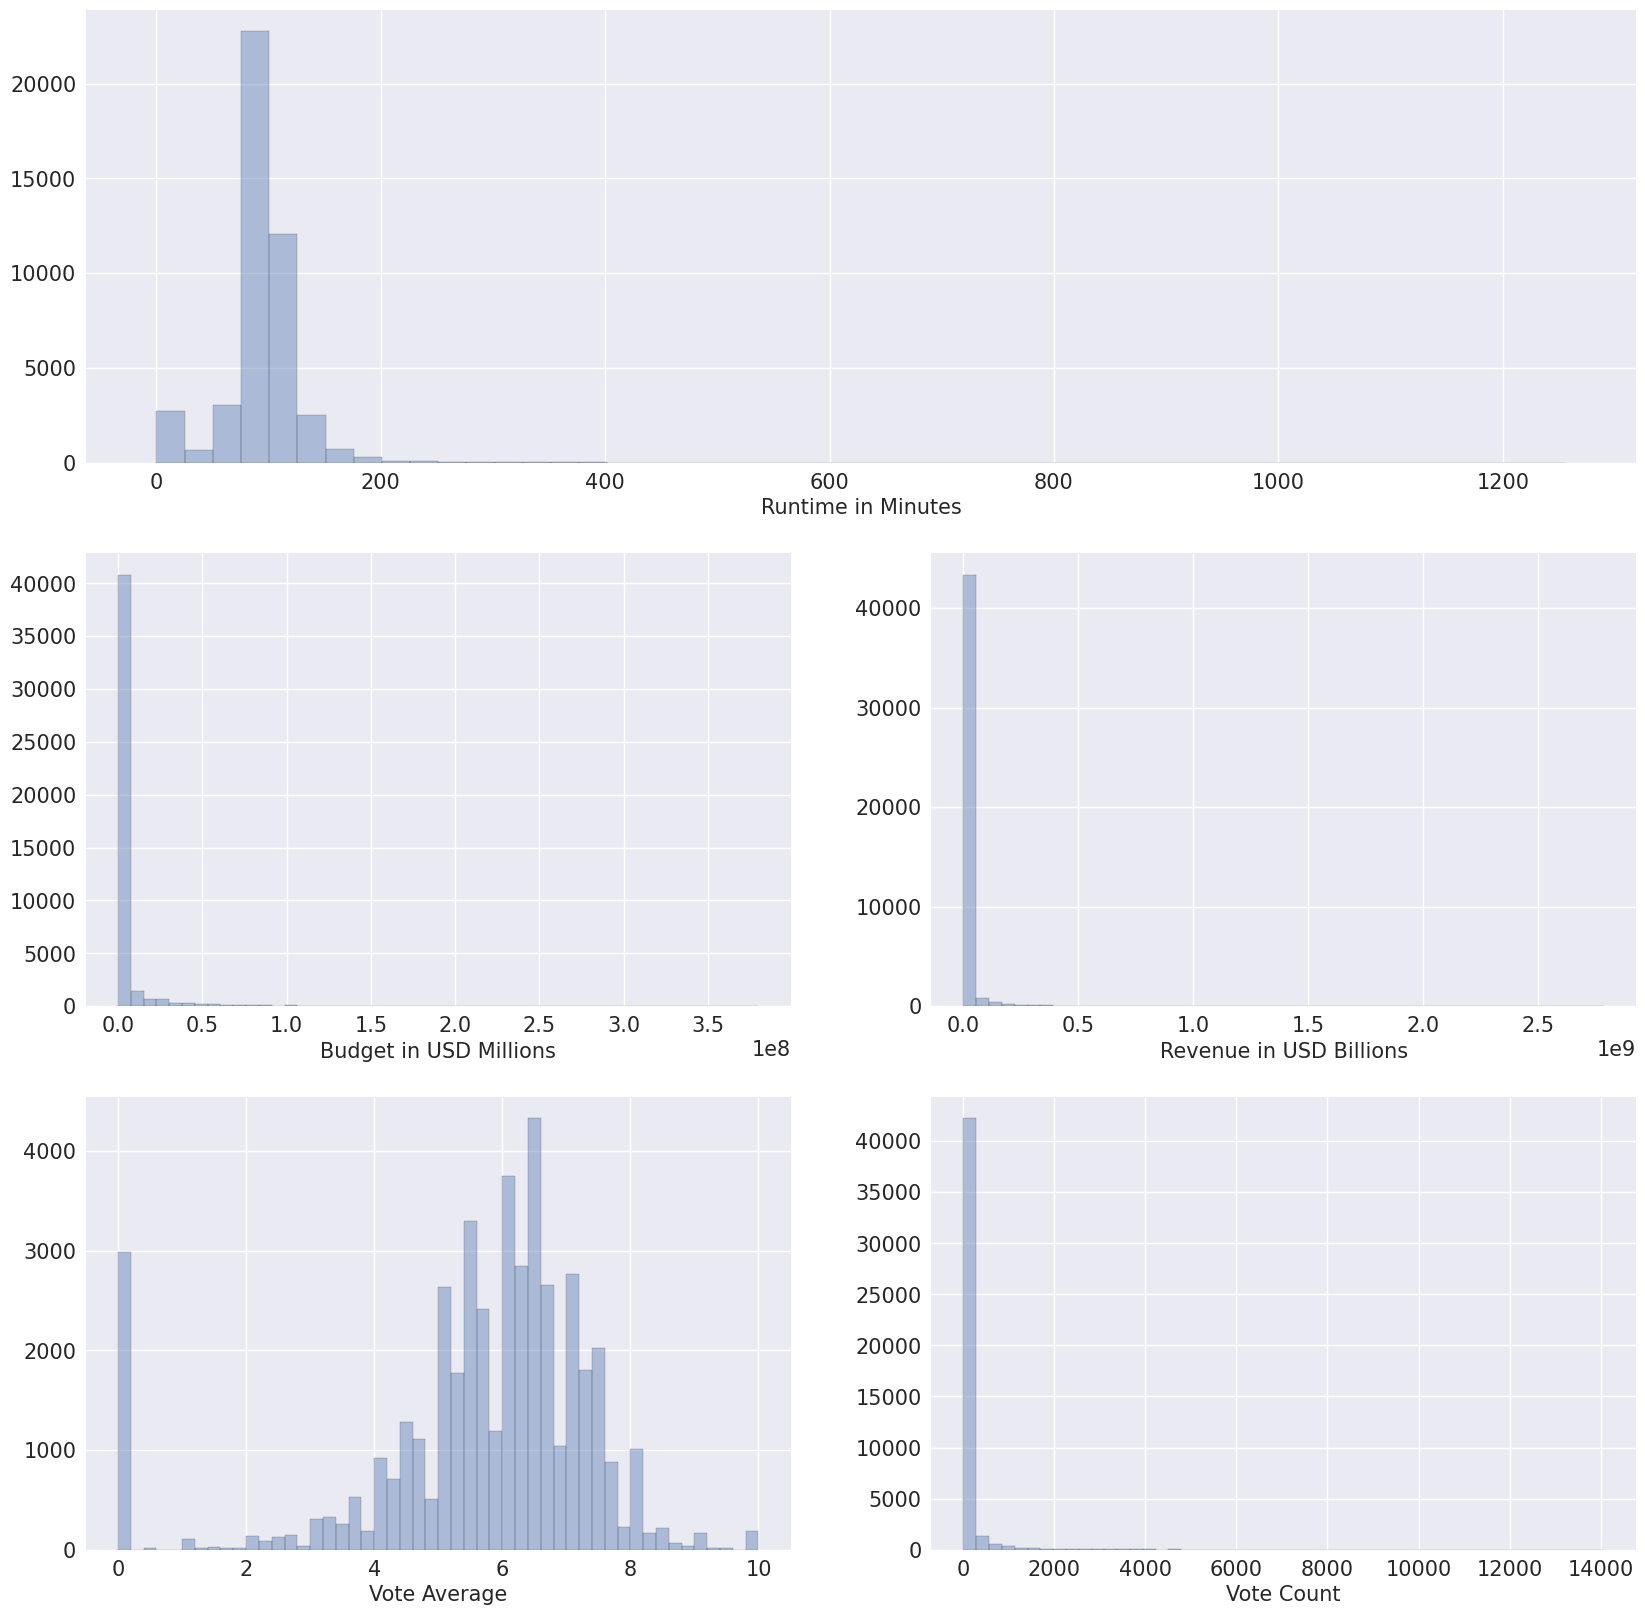

In [25]:
runtime_int = movies['runtime']/np.timedelta64(1, 'm')

with plt.style.context('seaborn'):
    fig = plt.figure(figsize=(20,20));
    grid = plt.GridSpec(3, 2, wspace=0.2, hspace=0.2);
    plt.rc(('xtick', 'ytick'), labelsize=15); plt.rc('axes', labelsize=15); plt.rcParams["patch.force_edgecolor"] = True;
    _ = plt.subplot(grid[0, 0:]); _ = sns.distplot(runtime_int, kde=False, axlabel='Runtime in Minutes');
    _ = plt.subplot(grid[1,0]); _ = sns.distplot(movies['budget'], kde=False, axlabel='Budget in USD Millions');
    _ = plt.subplot(grid[1,1]); _ = sns.distplot(movies['revenue'], kde=False, axlabel='Revenue in USD Billions');
    _ = plt.subplot(grid[2,0]); _ = sns.distplot(movies['vote_average'], kde=False, axlabel='Vote Average');
    _ = plt.subplot(grid[2,1]); _ = sns.distplot(movies['vote_count'], kde=False, axlabel='Vote Count');

The histograms represent the data displayed above. It's evident that all histograms, except one, exhibit significant right skewness, primarily because of a large number of zero or small values. The prevalent assumption for zero values is likely due to data unavailability, as it's improbable to produce a movie for free without generating at least some revenue.

Among the columns, only Vote_average closely resembles a normal distribution, with a median of 6.

### Top 10 <a id='C60'></a>

Listed below are the top 10 movies based on budget, revenue, hits, flops and ratings.

#### Budget <a id='C61'></a>

<AxesSubplot:xlabel='title', ylabel='budget'>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Pirates of the Caribbean: On Stranger Tides'),
  Text(1, 0, "Pirates of the Caribbean: At World's End"),
  Text(2, 0, 'Avengers: Age of Ultron'),
  Text(3, 0, 'Superman Returns'),
  Text(4, 0, 'John Carter'),
  Text(5, 0, 'Tangled'),
  Text(6, 0, 'Transformers: The Last Knight'),
  Text(7, 0, 'Spider-Man 3'),
  Text(8, 0, 'The Lone Ranger'),
  Text(9, 0, 'Harry Potter and the Deathly Hallows: Part 1')])

(array([0.0e+00, 5.0e+07, 1.0e+08, 1.5e+08, 2.0e+08, 2.5e+08, 3.0e+08,
        3.5e+08, 4.0e+08]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 0, '')

Text(0, 0.5, 'USD 100 Million')

Text(0.5, 1.0, 'Top 10 Highest Budget Movies')

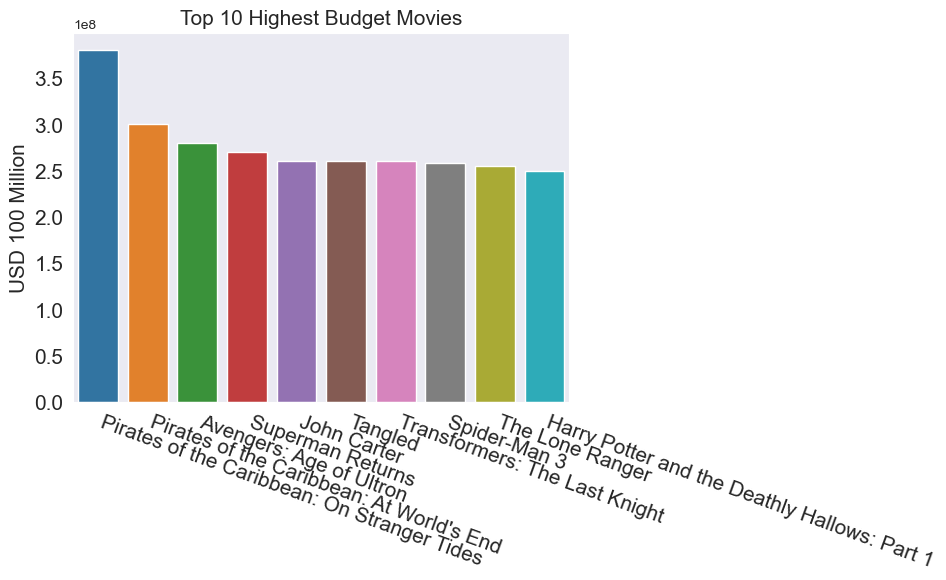

In [26]:
cols = ['title', 'budget']
budget_df = movies.sort_values('budget', ascending=False)[cols].set_index('title')
top_10_budget = budget_df.head(10)
sns.set_style('dark')
sns.barplot(data=top_10_budget, x=top_10_budget.index, y='budget');
plt.xticks(ha='left', rotation=-20, fontsize=15); plt.yticks(fontsize=15)
plt.xlabel(''); plt.ylabel('USD 100 Million', fontsize=15);
plt.title('Top 10 Highest Budget Movies', fontsize=15);
plt.show()

#### Box Office Revenue <a id='C64'></a>

<AxesSubplot:xlabel='title', ylabel='revenue'>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Avatar'),
  Text(1, 0, 'Star Wars: The Force Awakens'),
  Text(2, 0, 'Titanic'),
  Text(3, 0, 'The Avengers'),
  Text(4, 0, 'Jurassic World'),
  Text(5, 0, 'Furious 7'),
  Text(6, 0, 'Avengers: Age of Ultron'),
  Text(7, 0, 'Harry Potter and the Deathly Hallows: Part 2'),
  Text(8, 0, 'Frozen'),
  Text(9, 0, 'Beauty and the Beast')])

(array([0.0e+00, 5.0e+08, 1.0e+09, 1.5e+09, 2.0e+09, 2.5e+09, 3.0e+09]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 0, '')

Text(0, 0.5, 'USD Billion')

Text(0.5, 1.0, 'Top 10 Highest Revenue Movies')

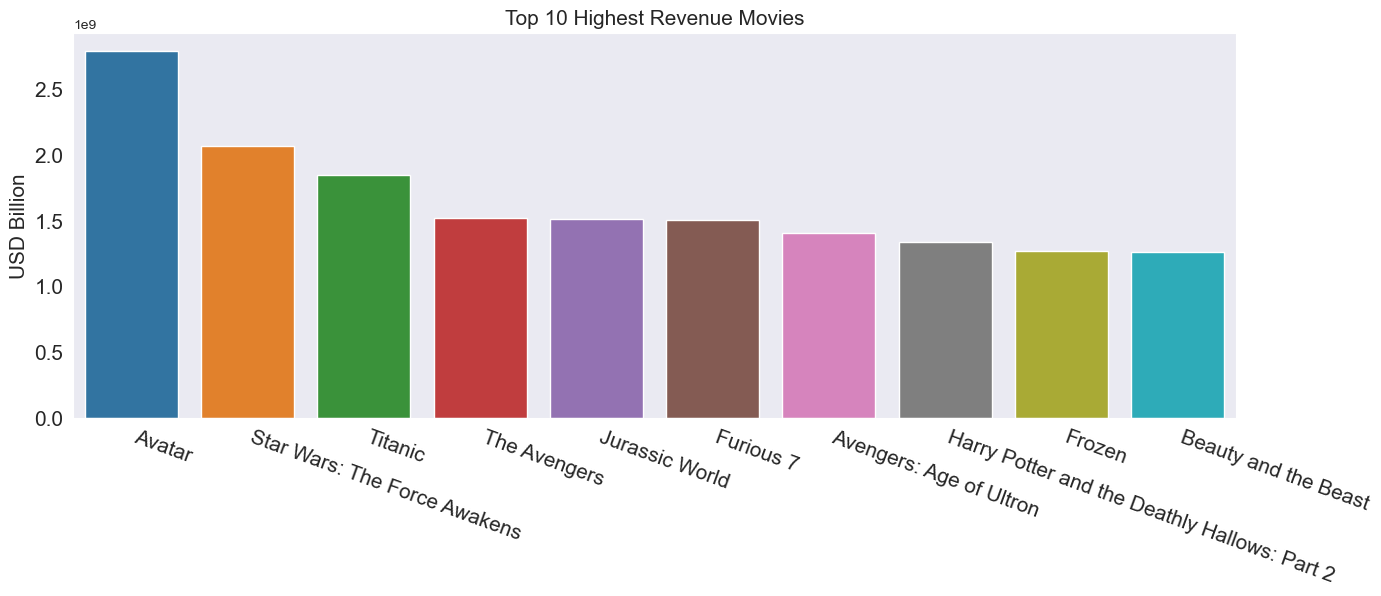

In [27]:
cols = ['title', 'revenue']
revenue_df = movies.sort_values('revenue', ascending=False)[cols].set_index('title')
top_10_revenue = revenue_df.head(10)

fig, ax = plt.subplots(figsize=(15,5))
sns.set_style('dark')
sns.barplot(data=top_10_revenue, x=top_10_revenue.index, y='revenue');
plt.xticks(ha='left', rotation=-20, fontsize=15); plt.yticks(fontsize=15)
plt.xlabel(''); plt.ylabel('USD Billion', fontsize=15);
plt.title('Top 10 Highest Revenue Movies', fontsize=15);
plt.show()

Regarding profit percentage, Avatar maintains its position at the top. However, the rankings shift for other movies. It's also astounding to observe how successful movies achieve profits that far exceed their initial budgets. For instance, Avatar has generated over 10 times its budget, while Avengers: Age of Ultron, which ranks lowest on this list, has earned nearly 4 times its budget.

#### Box Office Hits <a id='C67'></a>

<AxesSubplot:xlabel='title'>

Text(0, 0.5, 'USD Billion')

Text(0.5, 0, '')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Avatar'),
  Text(1, 0, 'Star Wars: The Force Awakens'),
  Text(2, 0, 'Titanic'),
  Text(3, 0, 'Jurassic World'),
  Text(4, 0, 'Furious 7'),
  Text(5, 0, 'The Avengers'),
  Text(6, 0, 'Harry Potter and the Deathly Hallows: Part 2'),
  Text(7, 0, 'Avengers: Age of Ultron'),
  Text(8, 0, 'Frozen'),
  Text(9, 0, 'Beauty and the Beast')])

Text(0.5, 0.98, 'Budget, Revenue and Profit for the Top 10 Profitable Movies')

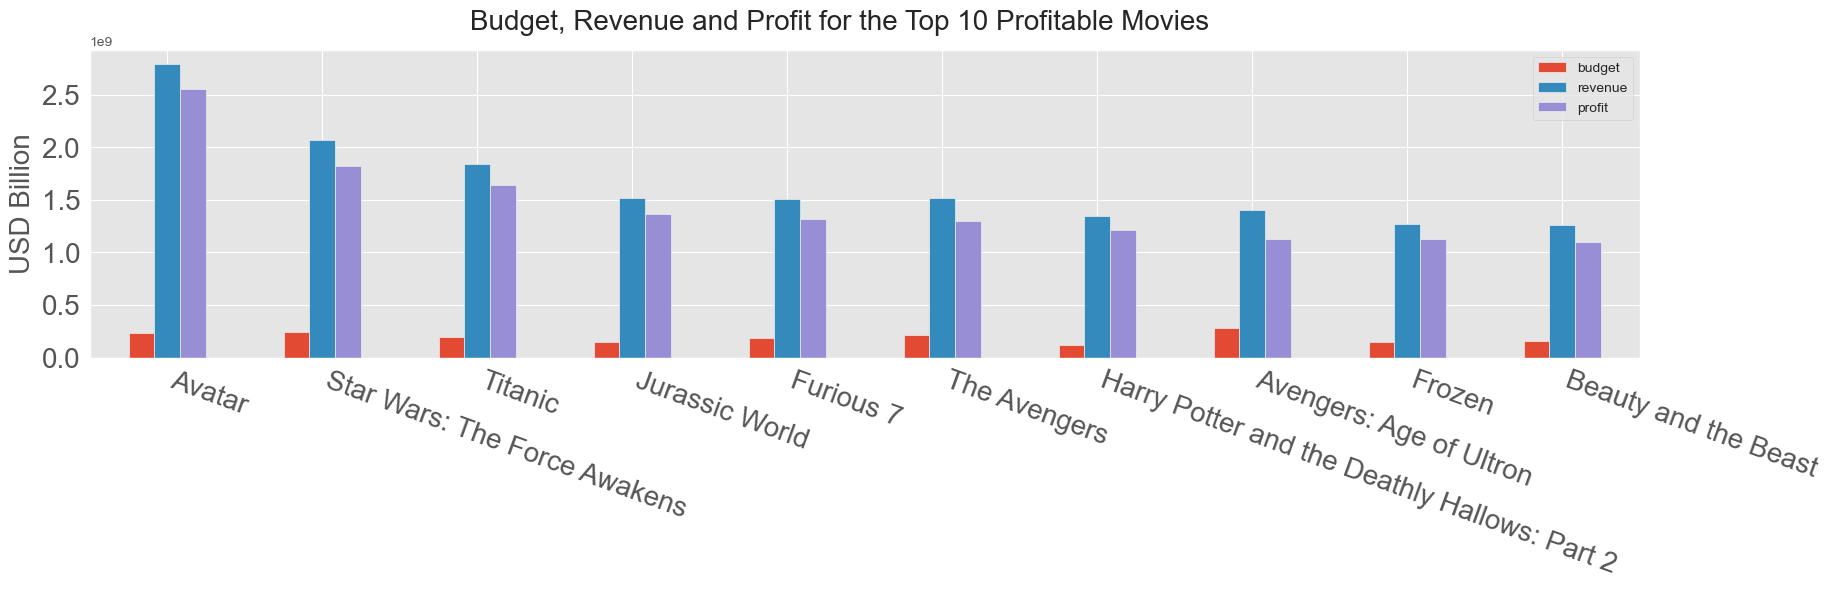

In [28]:
profits_ser = movies['revenue'] - movies['budget']
profits_ser.name = 'profit'
profits_df = movies.join(profits_ser)[['title', 'budget', 'revenue', 'profit']].sort_values('profit', ascending=False)
top_10_profits = profits_df.head(10).set_index('title')

plt.style.use('ggplot')
top_10_profits.plot(kind='bar', figsize=(20,4), fontsize=20)
plt.ylabel('USD Billion', fontsize=20); plt.xlabel('')
plt.xticks(rotation=-20, ha='left')
plt.suptitle('Budget, Revenue and Profit for the Top 10 Profitable Movies', fontsize=20)
plt.show()

In [29]:
profits_ser_perc = (top_10_profits['profit'] / top_10_profits['budget'] * 100)
profits_ser_perc = profits_ser_perc.sort_values(ascending=False).to_frame().rename(columns={0:'Profit Percentage'})

The visual representation clearly illustrates the substantial gap between the budget and profit among the top ten most profitable movies.

<AxesSubplot:xlabel='title', ylabel='Profit Percentage'>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Avatar'),
  Text(1, 0, 'Harry Potter and the Deathly Hallows: Part 2'),
  Text(2, 0, 'Jurassic World'),
  Text(3, 0, 'Titanic'),
  Text(4, 0, 'Frozen'),
  Text(5, 0, 'Star Wars: The Force Awakens'),
  Text(6, 0, 'Furious 7'),
  Text(7, 0, 'Beauty and the Beast'),
  Text(8, 0, 'The Avengers'),
  Text(9, 0, 'Avengers: Age of Ultron')])

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 0, '')

Text(0, 0.5, 'Profit Percentage')

Text(0.5, 1.0, 'Profit in Percentage for the Top 10 Profitable Movies')

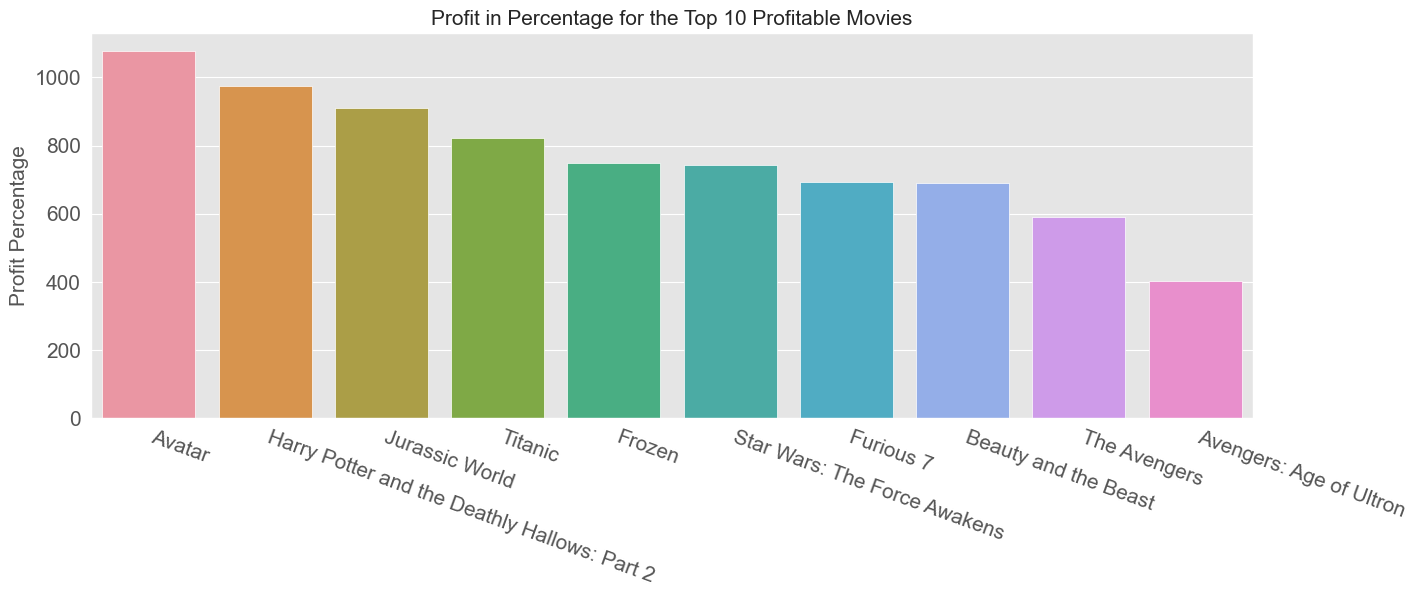

In [30]:

fig, ax = plt.subplots(figsize=(15,5))
sns.set_style('dark')
sns.barplot(data=profits_ser_perc, x=profits_ser_perc.index, y='Profit Percentage')
plt.xticks(ha='left', rotation=-20, fontsize=15); plt.yticks(fontsize=15)
plt.xlabel(''); plt.ylabel('Profit Percentage', fontsize=15);
plt.title('Profit in Percentage for the Top 10 Profitable Movies', fontsize=15);
plt.show()

When considering profit percentage, the narrative shifts slightly. While Avatar retains its top position, the rankings vary for other movies. It's truly remarkable how successful films manage to generate profits that surpass their initial budgets. For instance, Avatar has earned over 10 times its budget, while Avengers: Age of Ultron, situated at the bottom of this list, has yielded nearly 4 times its budget.

#### Box Office Flops <a id='C73'></a>

In [31]:
top_10_loss = profits_df[profits_df['revenue'] > 0].tail(10).sort_values(['profit', 'revenue']).set_index('title')

<AxesSubplot:xlabel='title'>

Text(0, 0.5, 'USD Billion')

Text(0.5, 0, '')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'The Lone Ranger'),
  Text(1, 0, 'The Alamo'),
  Text(2, 0, 'Mars Needs Moms'),
  Text(3, 0, 'Valerian and the City of a Thousand Planets'),
  Text(4, 0, 'The 13th Warrior'),
  Text(5, 0, 'The Adventures of Pluto Nash'),
  Text(6, 0, 'Metropolis'),
  Text(7, 0, 'Cutthroat Island'),
  Text(8, 0, 'Live by Night'),
  Text(9, 0, 'Flushed Away')])

Text(0.5, 0.98, 'Top 10 Losing Movies')

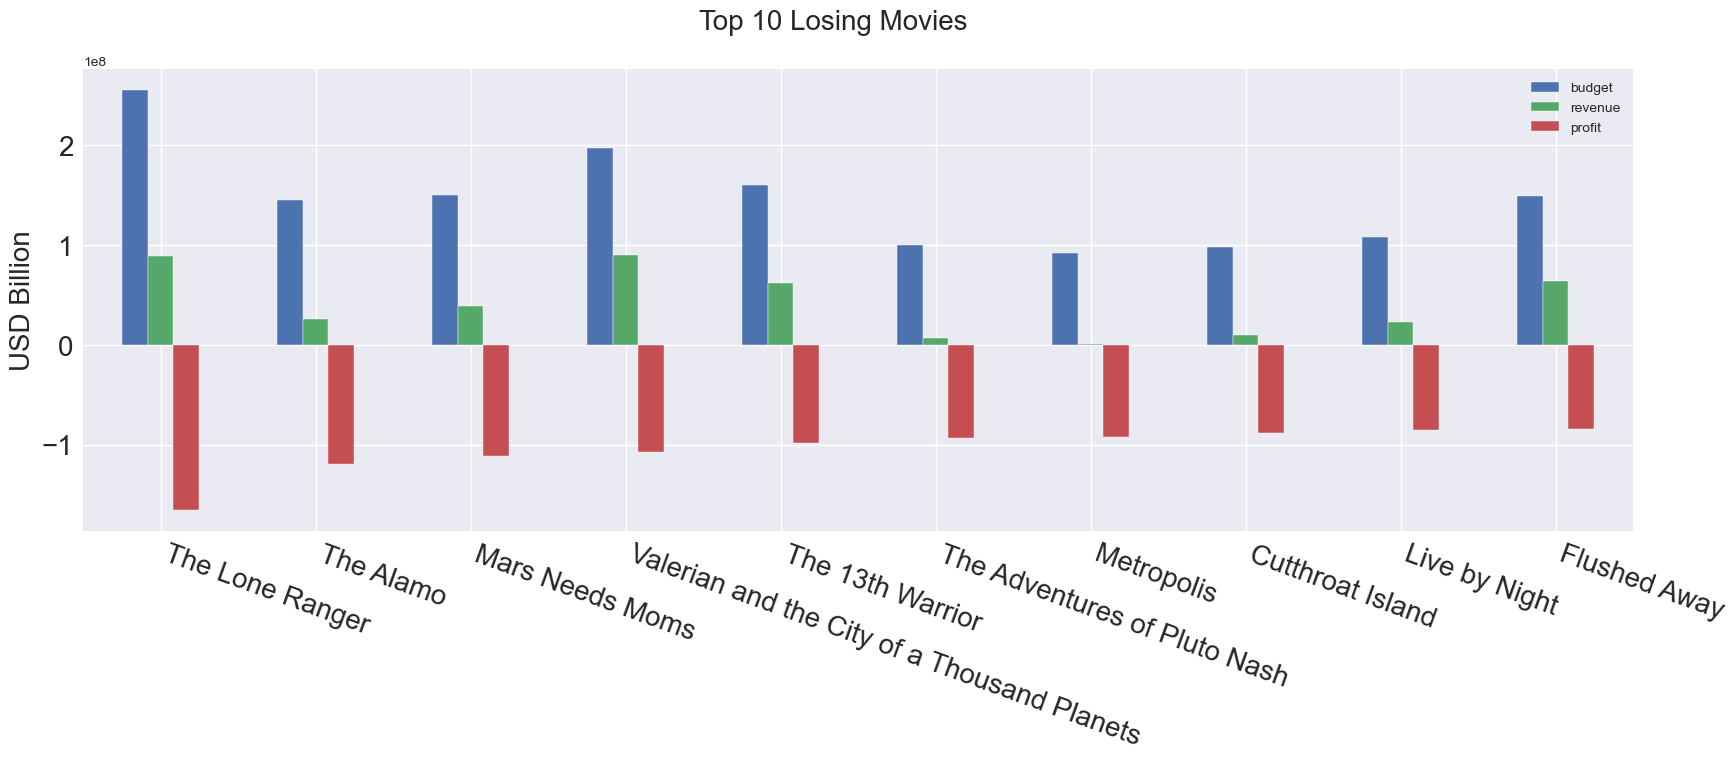

In [32]:

plt.style.use('seaborn')
top_10_loss.plot(kind='bar', figsize=(20,6), fontsize=20)
plt.ylabel('USD Billion', fontsize=20); plt.xlabel('')
plt.xticks(rotation=-20, ha='left')
plt.suptitle('Top 10 Losing Movies', fontsize=20)
plt.show()

I'm somewhat taken aback to see The Lone Ranger at the top of this list. Although I haven't seen the movie myself, I was aware that Johnny Depp starred in it, and I assumed it was a success. The 13th Warrior is another unexpected inclusion. In my experience, movies with compelling plots tend to have IMDb ratings greater than 6. It's interesting to note that both of these movies have IMDb ratings higher than 6 but haven't performed well at the box office. As for the other movies on this list, I don't have much insight into them.

##### Cleaning Credits Dataframe

Let's extract only the cast and the director from the credits DataFrame for now.

In [33]:
import re

cast_regex = re.compile(r"'name': '(.*?)'")
director_regex = re.compile(r"'Director', 'name': '(.*?)'")
credits['cast'] = credits['cast'].apply(lambda x: ', '.join(cast_regex.findall(x)))
credits['director'] = credits['crew'].apply(lambda x: ', '.join(director_regex.findall(x)))

In [34]:
credits.head()

,cast,crew,id,director
0,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,John Lasseter
1,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,Joe Johnston
2,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,Howard Deutch
3,"Whitney Houston, Angela Bassett, Loretta Devin...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,Forest Whitaker
4,"Steve Martin, Diane Keaton, Martin Short, Kimb...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,Charles Shyer


##### Merging Directors and Movie Genres
Listed below are directors and the movies genres for each movie id.

In [35]:
cond = credits.director == ''
directors = credits.loc[~cond, ['id', 'director']] #List of directors without ''

In [36]:
directors.head()

,id,director
0,862,John Lasseter
1,8844,Joe Johnston
2,15602,Howard Deutch
3,31357,Forest Whitaker
4,11862,Charles Shyer


In [37]:
cond2 = movies.genres == ''
genres = movies.loc[~cond2, 'genres'].reset_index() #Movie genres without ''

In [38]:
genres.head()

,index,genres
0,0,"Animation, Comedy, Family"
1,1,"Adventure, Fantasy, Family"
2,2,"Romance, Comedy"
3,3,"Comedy, Drama, Romance"
4,4,Comedy


In [39]:
genres.rename(columns={'index':'id'},inplace=True)

In [40]:
genres['id'] = genres['id'].astype(int) #Changing id to from obj to int for merging

director_genre = pd.merge(genres, directors, on='id') #Merging
director_genre.head(5)

,id,genres,director
0,2,"Romance, Comedy",Aki Kaurismäki
1,3,"Comedy, Drama, Romance",Aki Kaurismäki
2,5,"Action, Crime, Drama, Thriller","Allison Anders, Alexandre Rockwell, Robert Rod..."
3,6,"Comedy, Romance",Stephen Hopkins
4,11,"Comedy, Horror",George Lucas


##### Creating Dummy Varaibles for Genres
This process will help with retrieving the totals of each genre that a director has worked in.

In [41]:
genre_dummies = director_genre.genres.str.get_dummies(sep=', ') #Creating dummy variables for genres from director_genre
director_genre_dummies = director_genre.join(genre_dummies) #Joining director_genre with genre_dummies
director_genre_dummies.head(3)

,id,genres,director,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,2,"Romance, Comedy",Aki Kaurismäki,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,3,"Comedy, Drama, Romance",Aki Kaurismäki,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,5,"Action, Crime, Drama, Thriller","Allison Anders, Alexandre Rockwell, Robert Rod...",1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0


##### Famous Directors Genre Totals
Let us now create genre totals for all directors from the above DataFrame and filter only famous directors.

In [42]:
famous_directors = ['Martin Scorsese', 'Quentin Tarantino', 'Steven Spielberg', 'Alfred Hitchcock', 'Christopher Nolan',
                   'Tim Burton', 'James Cameron', 'Ridley Scott', 'George Lucas', 'Woody Allen', 'Clint Eastwood',
                   'Michael Bay', 'Guillermo del Toro', 'John Carpenter', 'Oliver Stone', 'Anurag Kashyap',
                   'Satyajit Ray', 'Mani Ratnam', 'Yash Chopra', 'Rajkumar Hirani', 'Prakash Jha', 'Karan Johar',
                   'S. Shankar', 'Mahesh Bhatt', 'Imtiaz Ali', 'A.R. Murugadoss'] # a small list of famous directors(google)

director_genre_totals = director_genre_dummies.groupby('director').sum() #summing the genres for each director with groupby
cond = director_genre_totals.index.isin(famous_directors) #checking if famous director are in director_genre_totals
famous_director_genres = director_genre_totals[cond] #filter for famous directors
famous_director_genres.drop('id', axis='columns', inplace=True) #dropping id as it is not required
famous_director_genres.head(3)

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
director,,,,,,,,,,,,,,,,,,,,
A.R. Murugadoss,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
Alfred Hitchcock,8,6,2,14,5,4,22,4,6,2,2,7,4,3,3,3,0,8,1,3
Anurag Kashyap,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1


### Merge the two data frames

In [43]:
#concat the two dataframes
movies_concat = pd.concat([credits, movies], axis=1)
movies_concat.head()

,cast,crew,id,director,imdb_id,title,original_title,release_date,overview,tagline,...,original_language,spoken_languages,production_companies,production_countries,budget,revenue,status,vote_average,vote_count,popularity
0,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,John Lasseter,tt0114709,Toy Story,Toy Story,1995-10-30,"Led by Woody, Andy's toys live happily in his ...",NaN,...,en,"en, English",Pixar Animation Studios,"US, United States of America",30000000.0,373554033.0,Released,7.7,5415.0,21.946943
1,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,Joe Johnston,tt0113497,Jumanji,Jumanji,1995-12-15,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,...,en,"en, English, fr, Français","TriStar Pictures, Teitler Film, Interscope Com...","US, United States of America",65000000.0,262797249.0,Released,6.9,2413.0,17.015539
2,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,Howard Deutch,tt0113228,Grumpier Old Men,Grumpier Old Men,1995-12-22,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,...,en,"en, English","Warner Bros., Lancaster Gate","US, United States of America",0.0,0.0,Released,6.5,92.0,11.712900
3,"Whitney Houston, Angela Bassett, Loretta Devin...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,Forest Whitaker,tt0114885,Waiting to Exhale,Waiting to Exhale,1995-12-22,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,...,en,"en, English",Twentieth Century Fox Film Corporation,"US, United States of America",16000000.0,81452156.0,Released,6.1,34.0,3.859495
4,"Steve Martin, Diane Keaton, Martin Short, Kimb...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,Charles Shyer,tt0113041,Father of the Bride Part II,Father of the Bride Part II,1995-02-10,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,...,en,"en, English","Sandollar Productions, Touchstone Pictures","US, United States of America",0.0,76578911.0,Released,5.7,173.0,8.387519


In [44]:
#remove the duplicated column 'id'
movies_df = movies_concat.loc[:,~movies_concat.columns.duplicated()]
movies_df.head()

,cast,crew,id,director,imdb_id,title,original_title,release_date,overview,tagline,...,original_language,spoken_languages,production_companies,production_countries,budget,revenue,status,vote_average,vote_count,popularity
0,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,John Lasseter,tt0114709,Toy Story,Toy Story,1995-10-30,"Led by Woody, Andy's toys live happily in his ...",NaN,...,en,"en, English",Pixar Animation Studios,"US, United States of America",30000000.0,373554033.0,Released,7.7,5415.0,21.946943
1,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,Joe Johnston,tt0113497,Jumanji,Jumanji,1995-12-15,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,...,en,"en, English, fr, Français","TriStar Pictures, Teitler Film, Interscope Com...","US, United States of America",65000000.0,262797249.0,Released,6.9,2413.0,17.015539
2,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,Howard Deutch,tt0113228,Grumpier Old Men,Grumpier Old Men,1995-12-22,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,...,en,"en, English","Warner Bros., Lancaster Gate","US, United States of America",0.0,0.0,Released,6.5,92.0,11.712900
3,"Whitney Houston, Angela Bassett, Loretta Devin...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,Forest Whitaker,tt0114885,Waiting to Exhale,Waiting to Exhale,1995-12-22,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,...,en,"en, English",Twentieth Century Fox Film Corporation,"US, United States of America",16000000.0,81452156.0,Released,6.1,34.0,3.859495
4,"Steve Martin, Diane Keaton, Martin Short, Kimb...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,Charles Shyer,tt0113041,Father of the Bride Part II,Father of the Bride Part II,1995-02-10,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,...,en,"en, English","Sandollar Productions, Touchstone Pictures","US, United States of America",0.0,76578911.0,Released,5.7,173.0,8.387519


## Demographic Filtering

Before we proceed:

1. We need a metric to score or rate movies.
2. The score for each movie must be calculated.
3. The best-rated movie according to users' preferences needs to be identified and scored.

For this purpose, we're using the IMDB's weighted rating (wr) formula:
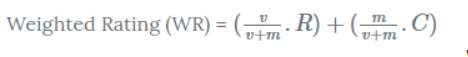
Where:
- \( v \) is the number of votes for the movie.
- \( m \) is the minimum votes required to be listed in the chart.
- \( R \) is the average rating of the movie.
- \( C \) is the mean vote across the whole report.
v (vote_count) and 
R (vote_average) are already given, and 
C can be calculated as:


In [45]:
C= movies_df['vote_average'].mean()
C

5.619218571050714

The mean rating for all movies is approximately 6 on a scale of 10.

Next, we need to determine an appropriate value for \( m \), the minimum votes required to be listed in the chart. The cutoff is set to 0.9, meaning that for a movie to be featured in the charts, it must have more votes than at least 90% of the movies in the list.

In [46]:
m= movies_df['vote_count'].quantile(0.9)
m

160.0

The next step is to filter out the movies that qualify for the chart

In [48]:
q_movies = movies_df.copy().loc[movies_df['vote_count'] >= m]
q_movies.shape

(4551, 22)

Now, we need to calculate the metric for each qualified movie.

In [49]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [50]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [51]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
314,The Shawshank Redemption,8358.0,8.5,8.445888
834,The Godfather,6024.0,8.5,8.425465
10309,Dilwale Dulhania Le Jayenge,661.0,9.1,8.421650
12481,The Dark Knight,12269.0,8.3,8.265490
2843,Fight Club,9678.0,8.3,8.256401
292,Pulp Fiction,8670.0,8.3,8.251424
522,Schindler's List,4436.0,8.3,8.206674
23673,Whiplash,4376.0,8.3,8.205440
5481,Spirited Away,3968.0,8.3,8.196094
2211,Life Is Beautiful,3643.0,8.3,8.187214


In [56]:
#plot the popularity of the movies
pop= movies_df.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")


<Figure size 1200x400 with 0 Axes>

<BarContainer object of 6 artists>

Text(0.5, 0, 'Popularity')

Text(0.5, 1.0, 'Popular Movies')

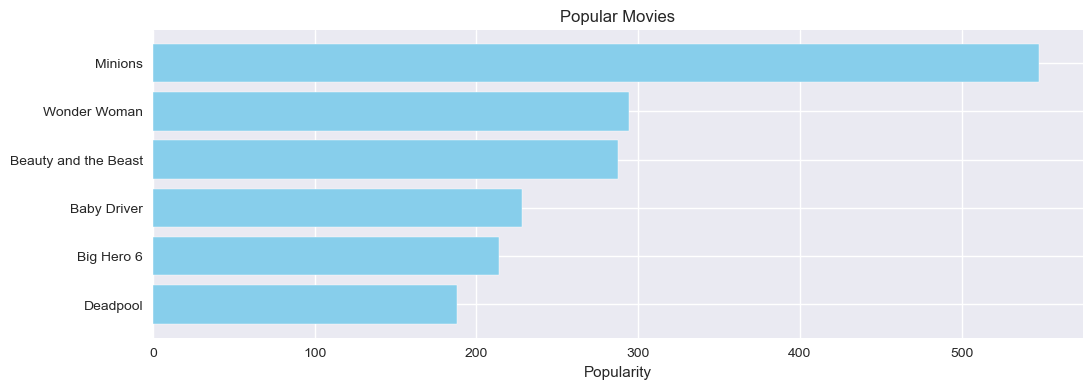

In [57]:
plt.show()

### Content Based Filtering

In this recommender system, the content of the movie, including its overview, cast, crew, keywords, tagline, etc., is utilized to determine its similarity with other movies. By analyzing these attributes, the system identifies movies that are most likely to be similar and recommends them to users.

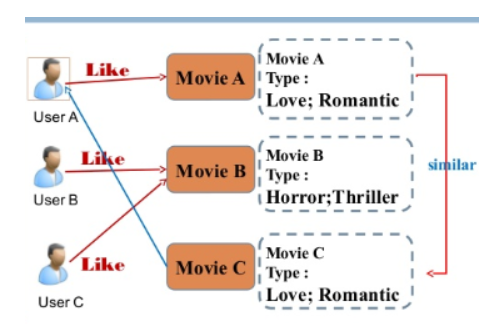

### Plot description based Recommender

We'll calculate pairwise similarity scores for all movies based on their plot descriptions and recommend movies based on those similarity scores. The plot descriptions are provided in the overview feature of our dataset. Let's examine the data.

In [60]:
movies_df['overview'].head(5)

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
3    Cheated on, mistreated and stepped on, the wom...
4    Just when George Banks has recovered from his ...
Name: overview, dtype: object

In [61]:

#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
movies_df['overview'] = movies_df['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(movies_df['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(45476, 75807)

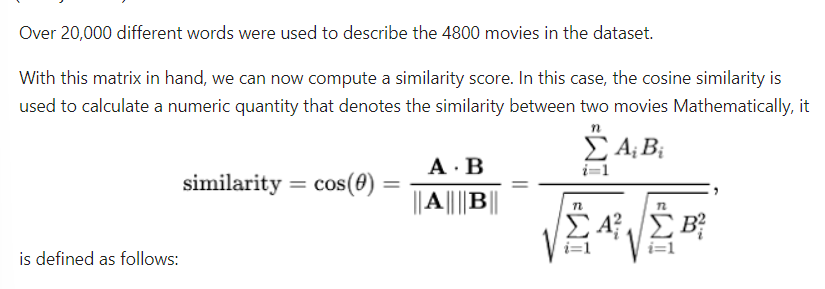

In [62]:

# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [63]:

#Construct a reverse map of indices and movie titles
indices = pd.Series(movies_df.index, index=movies_df['title']).drop_duplicates()

To define our recommendation function, we'll follow these steps:

1. Obtain the index of the movie given its title.
2. Retrieve the list of cosine similarity scores for that specific movie with all other movies. Convert this list into a list of tuples where the first element is its position and the second is the similarity score.
3. Sort the list of tuples based on the similarity scores (the second element).
4. Obtain the top 10 elements from this sorted list. Exclude the first element as it refers to the movie itself (the movie most similar to a particular movie is the movie itself).
5. Return the titles corresponding to the indices of the top elements.

In [64]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return movies_df['title'].iloc[movie_indices]

In [65]:
get_recommendations('The Dark Knight Rises') #test recommendation for the movie 'The Dark Knight Rises'

12481                                      The Dark Knight
150                                         Batman Forever
1328                                        Batman Returns
15511                           Batman: Under the Red Hood
585                                                 Batman
21194    Batman Unmasked: The Psychology of the Dark Kn...
9230                    Batman Beyond: Return of the Joker
18035                                     Batman: Year One
19792              Batman: The Dark Knight Returns, Part 1
3095                          Batman: Mask of the Phantasm
Name: title, dtype: object

In [67]:
get_recommendations('Interstellar')  #test recommendation for the movie 'Interstellar'

10674         Voices of a Distant Star
5460                 Suburban Commando
312                           Stargate
4728                    Hail Columbia!
23037     Space Pirate Captain Harlock
16335              On the Silver Globe
37041                      Time Runner
1598                 Starship Troopers
44216    Star Force: Fugitive Alien II
43523                           Cosmos
Name: title, dtype: object

### Collaborative Filtering

In this section, we'll employ a technique called Collaborative Filtering to provide recommendations to Movie Watchers. It consists of two main types:

1. **User-based filtering:** These systems suggest products to a user that similar users have liked. We can measure the similarity between two users using Pearson correlation or cosine similarity.

2. **Item-based Collaborative Filtering:** Instead of measuring the similarity between users, item-based CF recommends items based on their similarity with the items that the target user rated. Similarly, we can compute similarity using Pearson Correlation or Cosine Similarity. The primary distinction is that with item-based collaborative filtering, we fill in the blanks vertically, as opposed to the horizontal manner in which user-based CF operates. The following table demonstrates how to do so for the movie "Me Before You."

In [83]:
!pip install scikit-surprise

     -------------------------------------- 772.0/772.0 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp39-cp39-win_amd64.whl size=1094390 sha256=5939bf327ce9847a65368d4559ee271cd4894e878f6f7b9bc66bc6b2a8e86753
  Stored in directory: c:\users\vamsee\appdata\local\pip\cache\wheels\c6\3a\46\9b17b3512bdf283c6cb84f59929cdd5199d4e754d596d22784
Successfully built scikit-surprise


In [96]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
reader=Reader()

In [88]:
ratings_small.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [98]:

data = Dataset.load_from_df(ratings_small[['userId', 'movieId', 'rating']], reader)

In [100]:
svd=SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8924  0.8950  0.8972  0.8970  0.9056  0.8974  0.0044  
MAE (testset)     0.6871  0.6885  0.6910  0.6892  0.6975  0.6906  0.0036  
Fit time          0.75    0.81    0.82    0.78    0.76    0.78    0.03    
Test time         0.09    0.08    0.08    0.09    0.18    0.10    0.04    


{'test_rmse': array([0.89237362, 0.89502909, 0.89715164, 0.8969638 , 0.90556634]),
 'test_mae': array([0.68705944, 0.68848622, 0.6910127 , 0.68918646, 0.69746773]),
 'fit_time': (0.7457897663116455,
  0.8133077621459961,
  0.8168199062347412,
  0.7820746898651123,
  0.758406400680542),
 'test_time': (0.09253978729248047,
  0.08224749565124512,
  0.0808722972869873,
  0.0872189998626709,
  0.1805434226989746)}

In [101]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [102]:
ratings_small[ratings_small['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [103]:
svd.predict(1, 302, 3)

Prediction(uid=1, iid=302, r_ui=3, est=2.766807298520933, details={'was_impossible': False})

For the movie with ID 302, the estimated prediction is 2.766. One notable aspect of this recommender system is that it doesn't consider the content of the movie (or its features). It operates solely based on an assigned movie ID and aims to predict ratings by analyzing how other users have rated the movie.

## Collaborative based Recommendation System using KNN

In [105]:

from sklearn.neighbors import NearestNeighbors

In [106]:
links  = links.merge(ratings_small, on = 'movieId')

links.head(5)

,movieId,imdbId,tmdbId,userId,rating,timestamp
0,1,114709,862.0,7,3.0,851866703
1,1,114709,862.0,9,4.0,938629179
2,1,114709,862.0,13,5.0,1331380058
3,1,114709,862.0,15,2.0,997938310
4,1,114709,862.0,19,3.0,855190091


In [114]:
movies.columns

Index(['imdb_id', 'title', 'original_title', 'release_date', 'overview',
       'tagline', 'genres', 'runtime', 'original_language', 'spoken_languages',
       'production_companies', 'production_countries', 'budget', 'revenue',
       'status', 'vote_average', 'vote_count', 'popularity'],
      dtype='object')

In [115]:
links.columns

Index(['movieId', 'imdbId', 'id', 'userId', 'rating', 'timestamp'], dtype='object')

In [116]:
movies_meta=pd.read_csv("movies_metadata.csv",usecols=['id','imdb_id','title'])

In [117]:
movies_meta.columns

Index(['id', 'imdb_id', 'title'], dtype='object')

In [118]:
links.rename(columns = {'tmdbId':'id'}, inplace = True)
movies_meta = movies_meta.drop([29503,35587,19730])
movies_meta['id'] = movies_meta['id'].astype('int64')
movies_meta = movies_meta.merge(links,on='id')

In [119]:
df = movies_meta

df.head(5)

,id,imdb_id,title,movieId,imdbId,userId,rating,timestamp
0,862,tt0114709,Toy Story,1,114709,7,3.0,851866703
1,862,tt0114709,Toy Story,1,114709,9,4.0,938629179
2,862,tt0114709,Toy Story,1,114709,13,5.0,1331380058
3,862,tt0114709,Toy Story,1,114709,15,2.0,997938310
4,862,tt0114709,Toy Story,1,114709,19,3.0,855190091


In [120]:
df = movies_meta[['userId', 'movieId', 'rating', 'title']]

df.head(5)

,userId,movieId,rating,title
0,7,1,3.0,Toy Story
1,9,1,4.0,Toy Story
2,13,1,5.0,Toy Story
3,15,1,2.0,Toy Story
4,19,1,3.0,Toy Story


In [121]:
combine_movie_rating = df.dropna(axis = 0, subset = ['title'])

movie_ratingCount = (df.
                     groupby(by = ['title'])['rating'].
                     count().
                     reset_index().
                     rename(columns = {'rating': 'totalRatingCount'})
                     [['title', 'totalRatingCount']])

movie_ratingCount.head()

,title,totalRatingCount
0,$9.99,3
1,'Neath the Arizona Skies,1
2,"'night, Mother",3
3,(500) Days of Summer,45
4,...And God Created Woman,1


In [122]:
rating_with_totalRatingCount = combine_movie_rating.merge(movie_ratingCount, left_on = 'title', right_on = 'title', how = 'left')

rating_with_totalRatingCount.head()

,userId,movieId,rating,title,totalRatingCount
0,7,1,3.0,Toy Story,247
1,9,1,4.0,Toy Story,247
2,13,1,5.0,Toy Story,247
3,15,1,2.0,Toy Story,247
4,19,1,3.0,Toy Story,247


In [123]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(movie_ratingCount['totalRatingCount'].describe())

count   8754.000
mean      11.406
std       24.549
min        1.000
25%        1.000
50%        3.000
75%       10.000
max      341.000
Name: totalRatingCount, dtype: float64


### Lets assume that if the popularity count is greater than 50 (more than 50 ratings) its score should be higher and to be recommended

In [124]:
popularity_threshold = 50
rating_popular_movie= rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_movie.head()

,userId,movieId,rating,title,totalRatingCount
0,7,1,3.000,Toy Story,247
1,9,1,4.000,Toy Story,247
2,13,1,5.000,Toy Story,247
3,15,1,2.000,Toy Story,247
4,19,1,3.000,Toy Story,247


In [125]:
movie_features_df = rating_popular_movie.pivot_table(index='title', columns='userId', values='rating').fillna(0)
movie_features_df.head(10)

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000
12 Angry Men,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2001: A Space Odyssey,0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,...,0.000,0.000,4.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
28 Days Later,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
300,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,4.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
A Beautiful Mind,0.000,0.000,0.000,0.000,4.500,0.000,0.000,3.500,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000
A Bug's Life,0.000,0.000,0.000,0.000,3.500,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000
A Christmas Story,0.000,0.000,0.000,5.000,0.000,0.000,0.000,3.500,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000
A Clockwork Orange,0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,3.500,3.000,0.000,0.000,0.000,0.000,0.000,3.000


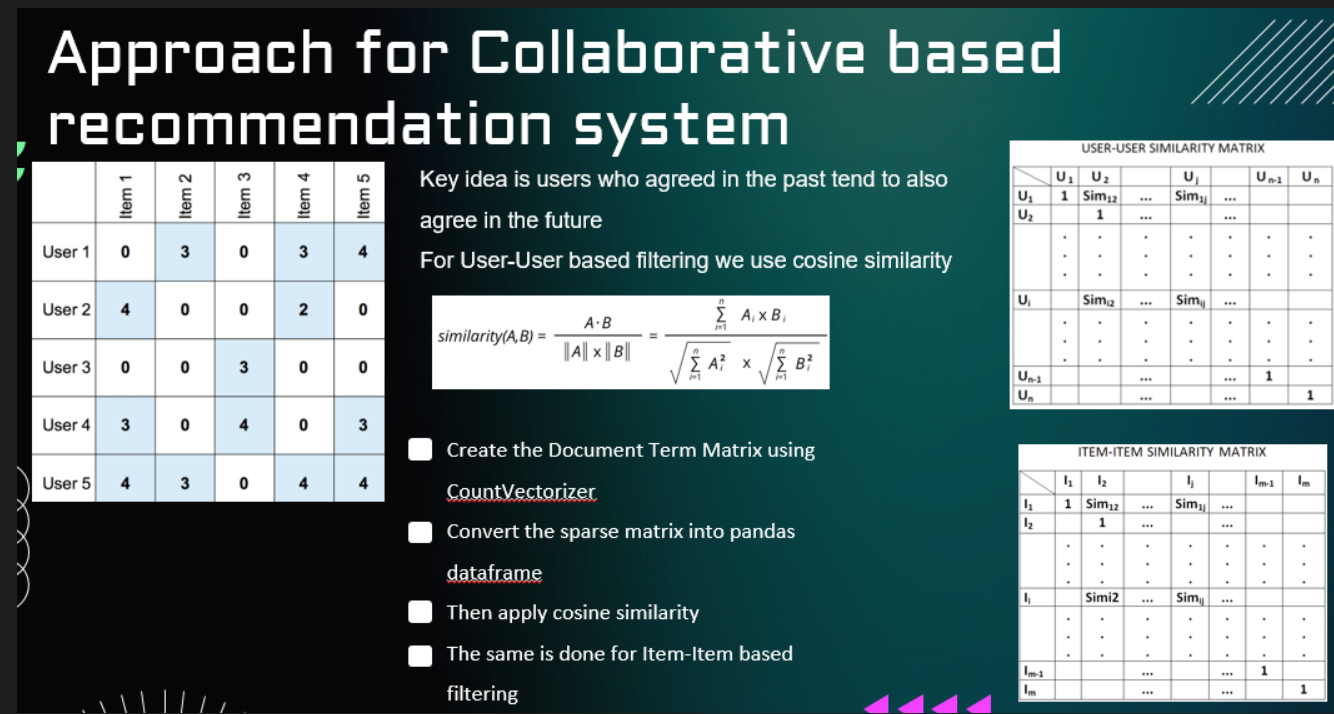

### csr_matrix

When a matrix consists mostly of 0 values, it's termed a sparse matrix. Representing such a matrix with a 2D array results in a significant waste of memory because the zeroes hold no meaningful information in many cases. Therefore, instead of storing all elements, we only store the non-zero elements. This involves storing non-zero elements as triples, with each triple representing (Row, Column, Value).

In [126]:
from scipy.sparse import csr_matrix

# converting the matrix into array matrix
movie_features_df_matrix = csr_matrix(movie_features_df.values)


from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')

model_knn.fit(movie_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [127]:
print(movie_features_df_matrix)

  (0, 12)	3.5
  (0, 14)	5.0
  (0, 44)	2.5
  (0, 55)	2.0
  (0, 60)	4.0
  (0, 72)	3.5
  (0, 73)	4.0
  (0, 94)	5.0
  (0, 97)	5.0
  (0, 110)	4.5
  (0, 124)	4.5
  (0, 127)	5.0
  (0, 133)	3.0
  (0, 148)	4.0
  (0, 149)	2.5
  (0, 168)	4.0
  (0, 186)	4.0
  (0, 206)	0.5
  (0, 211)	4.0
  (0, 212)	1.0
  (0, 237)	4.0
  (0, 238)	4.0
  (0, 254)	3.0
  (0, 267)	3.5
  (0, 288)	5.0
  :	:
  (465, 433)	4.0
  (465, 451)	4.0
  (465, 467)	3.5
  (465, 471)	4.0
  (465, 481)	5.0
  (465, 504)	3.5
  (465, 508)	4.0
  (465, 517)	3.0
  (465, 518)	4.0
  (465, 519)	3.5
  (465, 521)	4.0
  (465, 527)	4.0
  (465, 528)	4.0
  (465, 536)	4.0
  (465, 546)	5.0
  (465, 552)	4.0
  (465, 560)	4.5
  (465, 563)	5.0
  (465, 568)	1.0
  (465, 574)	4.0
  (465, 584)	5.0
  (465, 597)	3.5
  (465, 602)	5.0
  (465, 623)	3.0
  (465, 653)	4.5


In [128]:
def recommend_movie(movie_name):
    
    distances, indices = model_knn.kneighbors(movie_features_df.loc[movie_name,:].values.reshape(1, -1), n_neighbors = 6)
    
    for i in range(0, len(distances.flatten())):
        if i == 0:
            #print('Recommendations for {0}:\n'.format(movie_features_df.index[indices.flatten()[0]]))
            print('Recommendations for {0}:\n'.format(movie_name))
        else:
            print('{0}: {1}, with distance of {2}:'.format(i, movie_features_df.index[indices.flatten()[i]], distances.flatten()[i]))

In [129]:
recommend_movie('A Close Shave')

Recommendations for A Close Shave:

1: The Wrong Trousers, with distance of 0.3426323067106505:
2: This Is Spinal Tap, with distance of 0.6055093141588085:
3: Monty Python and the Holy Grail, with distance of 0.6101802075797369:
4: A Fish Called Wanda, with distance of 0.6147928467232779:
5: Life of Brian, with distance of 0.6189618572544828:


In [130]:
recommend_movie('Avatar')

Recommendations for Avatar:

1: Inception, with distance of 0.3663126779224054:
2: Iron Man, with distance of 0.36696298155661766:
3: The Dark Knight, with distance of 0.4246926245558492:
4: District 9, with distance of 0.43666774462351055:
5: Star Trek, with distance of 0.4385474244949342:


### NEURAL COLLABORATIVE FILTER

In [137]:
ratings_small.sort_values('timestamp')

,userId,movieId,rating,timestamp
52635,383,21,3.000,789652009
52641,383,47,5.000,789652009
52684,383,1079,3.000,789652009
56907,409,21,5.000,828212412
56909,409,25,4.000,828212412
...,...,...,...,...
35125,251,56587,5.000,1476623131
35172,251,134853,5.000,1476623217
35140,251,81847,4.500,1476623282
35096,251,6377,4.500,1476623300


,userId,movieId,rating,timestamp
0,1,31,2.500,1260759144
1,1,1029,3.000,1260759179
2,1,1061,3.000,1260759182
3,1,1129,2.000,1260759185
4,1,1172,4.000,1260759205


In [138]:

from sklearn.preprocessing import LabelEncoder
user_encoder = LabelEncoder()
movie_encoder = LabelEncoder()

user_ids = user_encoder.fit_transform(ratings_small.userId)
movie_ids = movie_encoder.fit_transform(ratings_small.movieId)

In [139]:

# train / val split
num_train = int(len(user_ids) * 0.8)
train_user_ids = user_ids[:num_train]
train_movie_ids = movie_ids[:num_train]
train_ratings = ratings_small.rating.values[:num_train]
val_user_ids = user_ids[num_train:]
val_movie_ids = movie_ids[num_train:]
val_ratings = ratings_small.rating.values[num_train:]

In [140]:
num_users= user_ids.max()+1
num_movies = movie_ids.max() + 1

In [141]:
train_ratings /= 5
val_ratings /= 5

In [142]:

def get_ncf_model():
    user_inp = Input((1,))
    user_hidden = Embedding(input_dim=num_users, output_dim=64)(user_inp)
    user_hidden = Flatten()(user_hidden)
    
    item_inp = Input((1,))
    item_hidden = Embedding(input_dim=num_movies, output_dim=64)(item_inp)
    item_hidden = Flatten()(item_hidden)
    
    # element-wise multiplication
    mf_output = Multiply()([user_hidden, item_hidden])
    
    hidden = concatenate([user_hidden, item_hidden])
    hidden = Dense(128, activation='relu')(hidden)
    hidden = Dropout(0.2)(hidden)
    mlp_output = Dense(64, activation='relu')(hidden)    

    
    output = concatenate([mf_output, mlp_output])
    output = Dense(1, activation='sigmoid')(output)
    
    model = Model(inputs=[user_inp, item_inp], outputs=output)
    model.compile(loss='mse', optimizer='adam')
    return model

In [143]:
model = get_ncf_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1, 64)        42944       ['input_1[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 1, 64)        580224      ['input_2[0][0]']                
                                                                                              

In [144]:
from keras.callbacks import EarlyStopping
# early stopping wait for 1 epoch
callbacks = [EarlyStopping(patience=1)]

# train for 50 epochs
model.fit([train_user_ids, train_movie_ids], train_ratings,\
          validation_data=([val_user_ids, val_movie_ids], val_ratings), epochs=50, batch_size=128, callbacks=callbacks)

Epoch 1/50
626/626 [==============================] - 4s 5ms/step - loss: 0.0359 - val_loss: 0.0367
Epoch 2/50
626/626 [==============================] - 3s 5ms/step - loss: 0.0298 - val_loss: 0.0370


In [145]:
def dcg_at_k(r, k):
    '''
    Compute DCG
    args:
        r: np.array, to be evaluated
        k: int, number of entries to be considered
    
    returns:
        dcg: float, computed dcg
        
    '''
    r = r[:k]
    dcg = np.sum(r / np.log2(np.arange(2, len(r) + 2)))
    return dcg

In [146]:

def ndcg_at_k(r, k, method=0):
    '''
    Compute NDCG
    args:
        r: np.array, to be evaluated
        k: int, number of entries to be considered
    
    returns:
        dcg: float, computed ndcg
        
    '''
    dcg_max = dcg_at_k(sorted(r, reverse=True), k)

    return dcg_at_k(r, k) / dcg_max

In [147]:
# compute average ndcg for all users
def evaluate_prediction(predictions):
    '''
    Return the average ndcg for each users
    args:
        predictions: np.array user-item predictions
    returns:
        ndcg: float, computed NDCG
    '''
    ndcgs = []
    for target_user in np.unique(val_user_ids):
        # get movie ids and ratings associated with the target user.
        target_val_movie_ids = val_movie_ids[val_user_ids == target_user] 
        target_val_ratings = val_ratings[val_user_ids == target_user] 
        
        # compute ndcg for this user
        ndcg = ndcg_at_k(target_val_ratings[np.argsort(-predictions[val_user_ids == target_user])], k=30)
        ndcgs.append(ndcg)
    ndcg = np.mean(ndcgs)
    return ndcg

In [148]:

# prediction & evalutation
predictions = model.predict([val_user_ids, val_movie_ids])
evaluate_prediction(predictions[:,0])

626/626 [==============================] - 1s 635us/step


0.8908521760619849